# 2018-19 English Premier League: An Exploratory Data Analysis

- This dataset contains data of every game from the 2018-2019 season in the English Premier League. 
- In this project, I aim to explore the data and communicate some interesting findings. 
- The last section of this project shows the correlation between various columns of the data. 

[Source](https://data.world/chas/2018-2019-premier-league-matches) of dataset.

## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset into a dataframe
df = pd.read_csv("soccer18-19.csv")

#Printing the number of rows and columns
print('Number of rows and columns:', df.shape)

#Printing out the first five rows
df.head()


Number of rows and columns: (380, 23)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0


## Understanding Columns & Values 
- The info() function ia useful tool to summarize the data. 
- Here, I'm going to analyze each column's name, datatype and number of non-null rows they carry. 
- This is important to see if there are any missing values and to get familiar with the overall dataset. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

In [3]:
print(df.head(10).to_markdown())

|    | Div   | Date    | HomeTeam     | AwayTeam       |   FTHG |   FTAG | FTR   |   HTHG |   HTAG | HTR   | Referee    |   HS |   AS |   HST |   AST |   HF |   AF |   HC |   AC |   HY |   AY |   HR |   AR |
|---:|:------|:--------|:-------------|:---------------|-------:|-------:|:------|-------:|-------:|:------|:-----------|-----:|-----:|------:|------:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  0 | E0    | 10/8/18 | Man United   | Leicester      |      2 |      1 | H     |      1 |      0 | H     | A Marriner |    8 |   13 |     6 |     4 |   11 |    8 |    2 |    5 |    2 |    1 |    0 |    0 |
|  1 | E0    | 11/8/18 | Bournemouth  | Cardiff        |      2 |      0 | H     |      1 |      0 | H     | K Friend   |   12 |   10 |     4 |     1 |   11 |    9 |    7 |    4 |    1 |    1 |    0 |    0 |
|  2 | E0    | 11/8/18 | Fulham       | Crystal Palace |      0 |      2 | A     |      0 |      1 | A     | M Dean     |   15 |   10 |     6 |     9 |    9 |   11 |   

In [4]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,5.705263,4.552632,1.526316,1.684211,0.047368,0.076316
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,2.971718,2.730627,1.222844,1.209140,0.212706,0.275599
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,4.000000,2.750000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,8.000000,6.000000,2.000000,2.000000,0.000000,0.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,16.000000,14.000000,6.000000,5.000000,1.000000,2.000000


- Using the unique() function to print distinct values of the 'Home Team' column. 
- This will show us all the teams that participated in the season. 

In [5]:
df['HomeTeam'].unique()

array(['Man United', 'Bournemouth', 'Fulham', 'Huddersfield', 'Newcastle',
       'Watford', 'Wolves', 'Arsenal', 'Liverpool', 'Southampton',
       'Cardiff', 'Chelsea', 'Everton', 'Leicester', 'Tottenham',
       'West Ham', 'Brighton', 'Burnley', 'Man City', 'Crystal Palace'],
      dtype=object)

- Using the value_counts() function to print out the number of rows for each unique team.
- This shows how many matches each team played as Home Team. 
- Note: Every team playes 19 matches as Home Team and other 19 as Away.

In [6]:
#dropna=True, it means that any missing values in the data will be dropped or excluded from the result.
df['HomeTeam'].value_counts(dropna=True)

Man United        19
Bournemouth       19
Man City          19
Burnley           19
Brighton          19
West Ham          19
Tottenham         19
Leicester         19
Everton           19
Chelsea           19
Cardiff           19
Southampton       19
Liverpool         19
Arsenal           19
Wolves            19
Watford           19
Newcastle         19
Huddersfield      19
Fulham            19
Crystal Palace    19
Name: HomeTeam, dtype: int64

# Data Visualizations

## Checking the Distribution

Plotting the distribution of full-time home and away goals.

<Axes: ylabel='Frequency'>

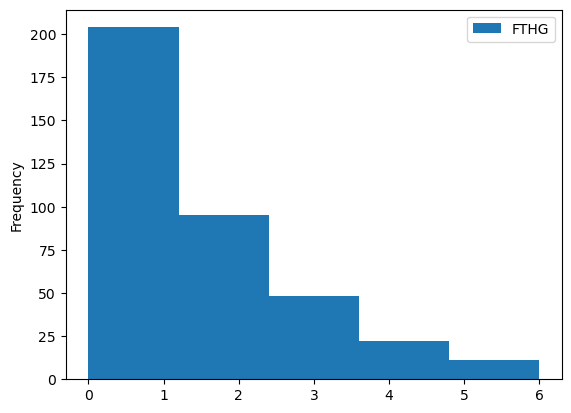

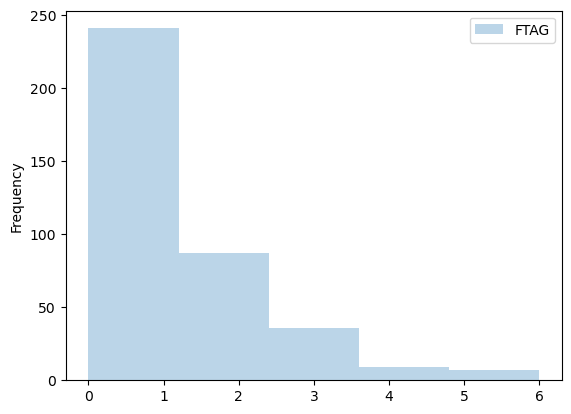

In [7]:
#Home Goals
df.plot(
	kind = "hist",
    y = 'FTHG',
    bins = 5,
    # figsize = (12,8)
)

#Away Goals
df.plot(
	kind = "hist",
    y = 'FTAG',
    bins = 5,
    alpha = 0.3,
    # figsize = (12,8)
)

- Distribution of home and away goals is similar. 
- However, the frequency of away goals seems to be higher in the 0 - 1 range. 

## Comparing Averages

- Now, we will use a bar plot to compare averages of a numeric column across a categorical columns. 
- So, in our case, let's calculate the avg home goals scored by teams when they were playing at their home stadium. 

<Axes: title={'center': 'Average Home Goals Scored by Home Teams'}, xlabel='Home Team', ylabel='Home goals scored'>

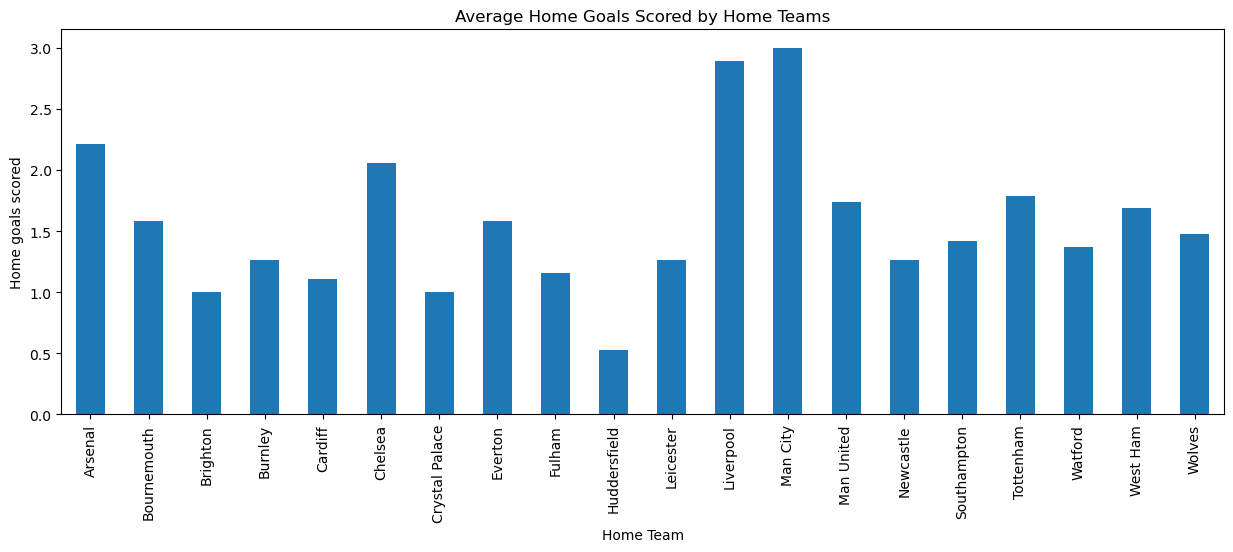

In [8]:
#Grouping by HomeTeam
df_bar = df.groupby(["HomeTeam"])["FTHG"].mean()

#Bar Plot
df_bar.plot(
	kind='bar',
    ylabel='Home goals scored',
    xlabel = 'Home Team',
    title = 'Average Home Goals Scored by Home Teams',
    figsize=(15,5)
)

- Liverpool & Manchester City have the highest average number of home goals scored as home teams. 
- What about the most amount away goals scored by away teams?

<Axes: title={'center': 'Average Away Goals Scored by Away Teams'}, xlabel='Away Team', ylabel='Away goals scored'>

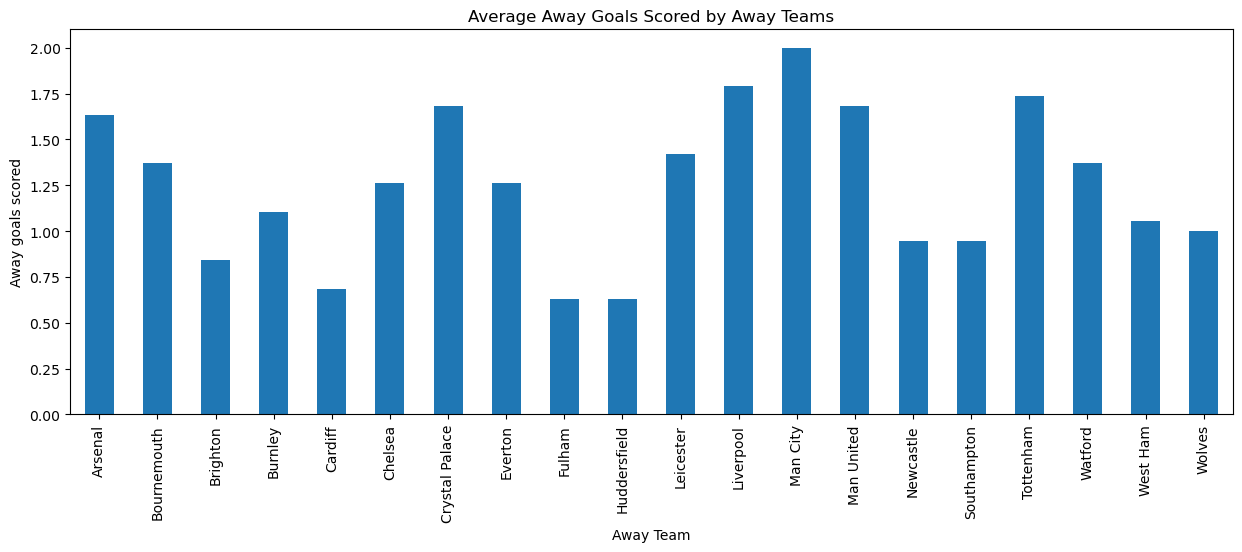

In [9]:
#Grouping by Away Team
df_bar = df.groupby(["AwayTeam"])['FTAG'].mean()

#Bar Plot
df_bar.plot(
		kind='bar',
    	ylabel='Away goals scored',
    	xlabel = 'Away Team',
        title = 'Average Away Goals Scored by Away Teams',
	   	figsize=(15,5)
)

- Looks like Manchester City had the highest average number of away goals scored as away team as well.
- Followed by Liverpool, Man united, Tottenham and Crystal Palace

The correlation between shots on target and goals scored is: 0.8851169677306291


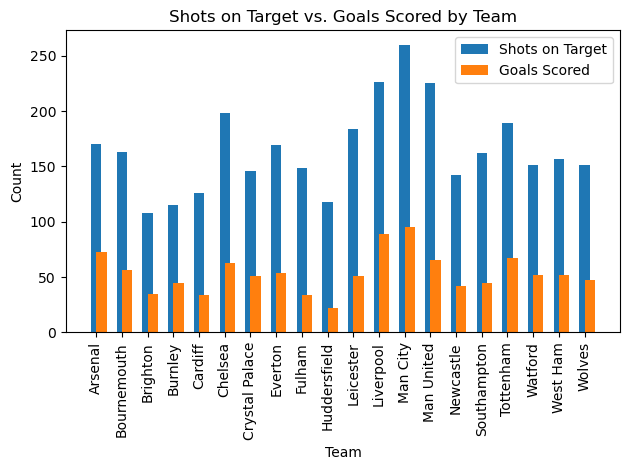

In [10]:

# Calculate the total shots on target and goals scored by each team
total_shots_on_target = df.groupby('HomeTeam')['HST'].sum() + df.groupby('AwayTeam')['AST'].sum()
total_goals_scored = df.groupby('HomeTeam')['FTHG'].sum() + df.groupby('AwayTeam')['FTAG'].sum()

# Calculate the correlation between shots on target and goals scored
correlation = total_shots_on_target.corr(total_goals_scored)

print("The correlation between shots on target and goals scored is:", correlation)

# Create a bar plot to visualize the relationship between shots on target and goals scored
teams = total_shots_on_target.index
x = range(len(teams))

plt.bar(x, total_shots_on_target, width=0.4, align='center', label='Shots on Target')
plt.bar(x, total_goals_scored, width=0.4, align='edge', label='Goals Scored')
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Shots on Target vs. Goals Scored by Team')
plt.xticks(x, teams, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
# Calculate the goal-to-shot ratio per match for each team
df['GoalToShotRatio'] = (df['FTHG'] + df['FTAG']) / (df['HS'] + df['AS'])

# Calculate the average goal-to-shot ratio per match for each team
average_ratio_per_match = df.groupby('HomeTeam')['GoalToShotRatio'].mean()

# Find the team with the highest average goal-to-shot ratio per match
team_with_highest_average_ratio = average_ratio_per_match.idxmax()

print("The team with the highest average goal-to-shot ratio per match is:", team_with_highest_average_ratio)

The team with the highest average goal-to-shot ratio per match is: Man City


In [12]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the goal-to-shot ratio per match for each team
df['GoalToShotRatio'] = (df['FTHG'] + df['FTAG']) / (df['HS'] + df['AS'])

# Create a column for week number
df['Week'] = df['Date'].dt.week

# Calculate the count of occurrences for each team with the highest goal-to-shot ratio per week
most_goals_less_shots_per_week = df.groupby(['Week']).apply(lambda x: x.loc[x['GoalToShotRatio'].idxmax(), 'HomeTeam']).value_counts()

# Find the team with the most occurrences of having the highest goal-to-shot ratio per week
team_with_most_goals_less_shots = most_goals_less_shots_per_week.idxmax()

print("The team that has scored the most goals with fewer shots per week is:", team_with_most_goals_less_shots)

The team that has scored the most goals with fewer shots per week is: West Ham


/tmp/ipykernel_8001/530555605.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipykernel_8001/530555605.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


In [13]:


# Calculate the goal-to-shot ratio for each team
df['TotalShots'] = df['HS'] + df['AS']
df['GoalsToShotsRatio'] = (df['FTHG'] + df['FTAG']) / df['TotalShots']
team_goals_to_shots_ratio = df.groupby('HomeTeam')['GoalsToShotsRatio'].mean()

# Find the team with the highest goal-to-shot ratio
team_with_highest_ratio = team_goals_to_shots_ratio.idxmax()

print("The team that scores the most goals with fewer shots is:", team_with_highest_ratio)


The team that scores the most goals with fewer shots is: Man City
